Import Libraries

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split , GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error , r2_score

Load dataset

In [319]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Data Cleaning

In [321]:
nulls = data.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [322]:
# Drop columns with too many nulls
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage'], axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [323]:
data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [324]:
data.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Data Preprocessing

In [325]:
data.drop(['Id'], axis=1, inplace=True)

In [326]:
inputs=data.drop(columns=['SalePrice'])
output=data['SalePrice']

In [327]:
label = LabelEncoder()
for col in ['Street','Utilities','CentralAir']:
    inputs[col] = label.fit_transform(inputs[col])
inputs.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,1,NaN,Reg,Lvl,0,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,1,NaN,Reg,Lvl,0,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,1,NaN,IR1,Lvl,0,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,1,NaN,IR1,Lvl,0,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,1,NaN,IR1,Lvl,0,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [328]:
categorical_cols = inputs.select_dtypes(exclude=["int64", "float64"]).columns
inputs = pd.get_dummies(inputs, columns=categorical_cols)
data_preprocessed = pd.concat([inputs, output], axis=1)
data_preprocessed.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,1,0,7,5,2003,2003,196.0,...,False,False,True,False,False,False,False,True,False,208500
1,20,80.0,9600,1,0,6,8,1976,1976,0.0,...,False,False,True,False,False,False,False,True,False,181500
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,False,False,True,False,False,False,False,True,False,223500
3,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,False,False,True,True,False,False,False,False,False,140000
4,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,False,False,True,False,False,False,False,True,False,250000


Feature Selection

In [329]:
corr= data_preprocessed.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)


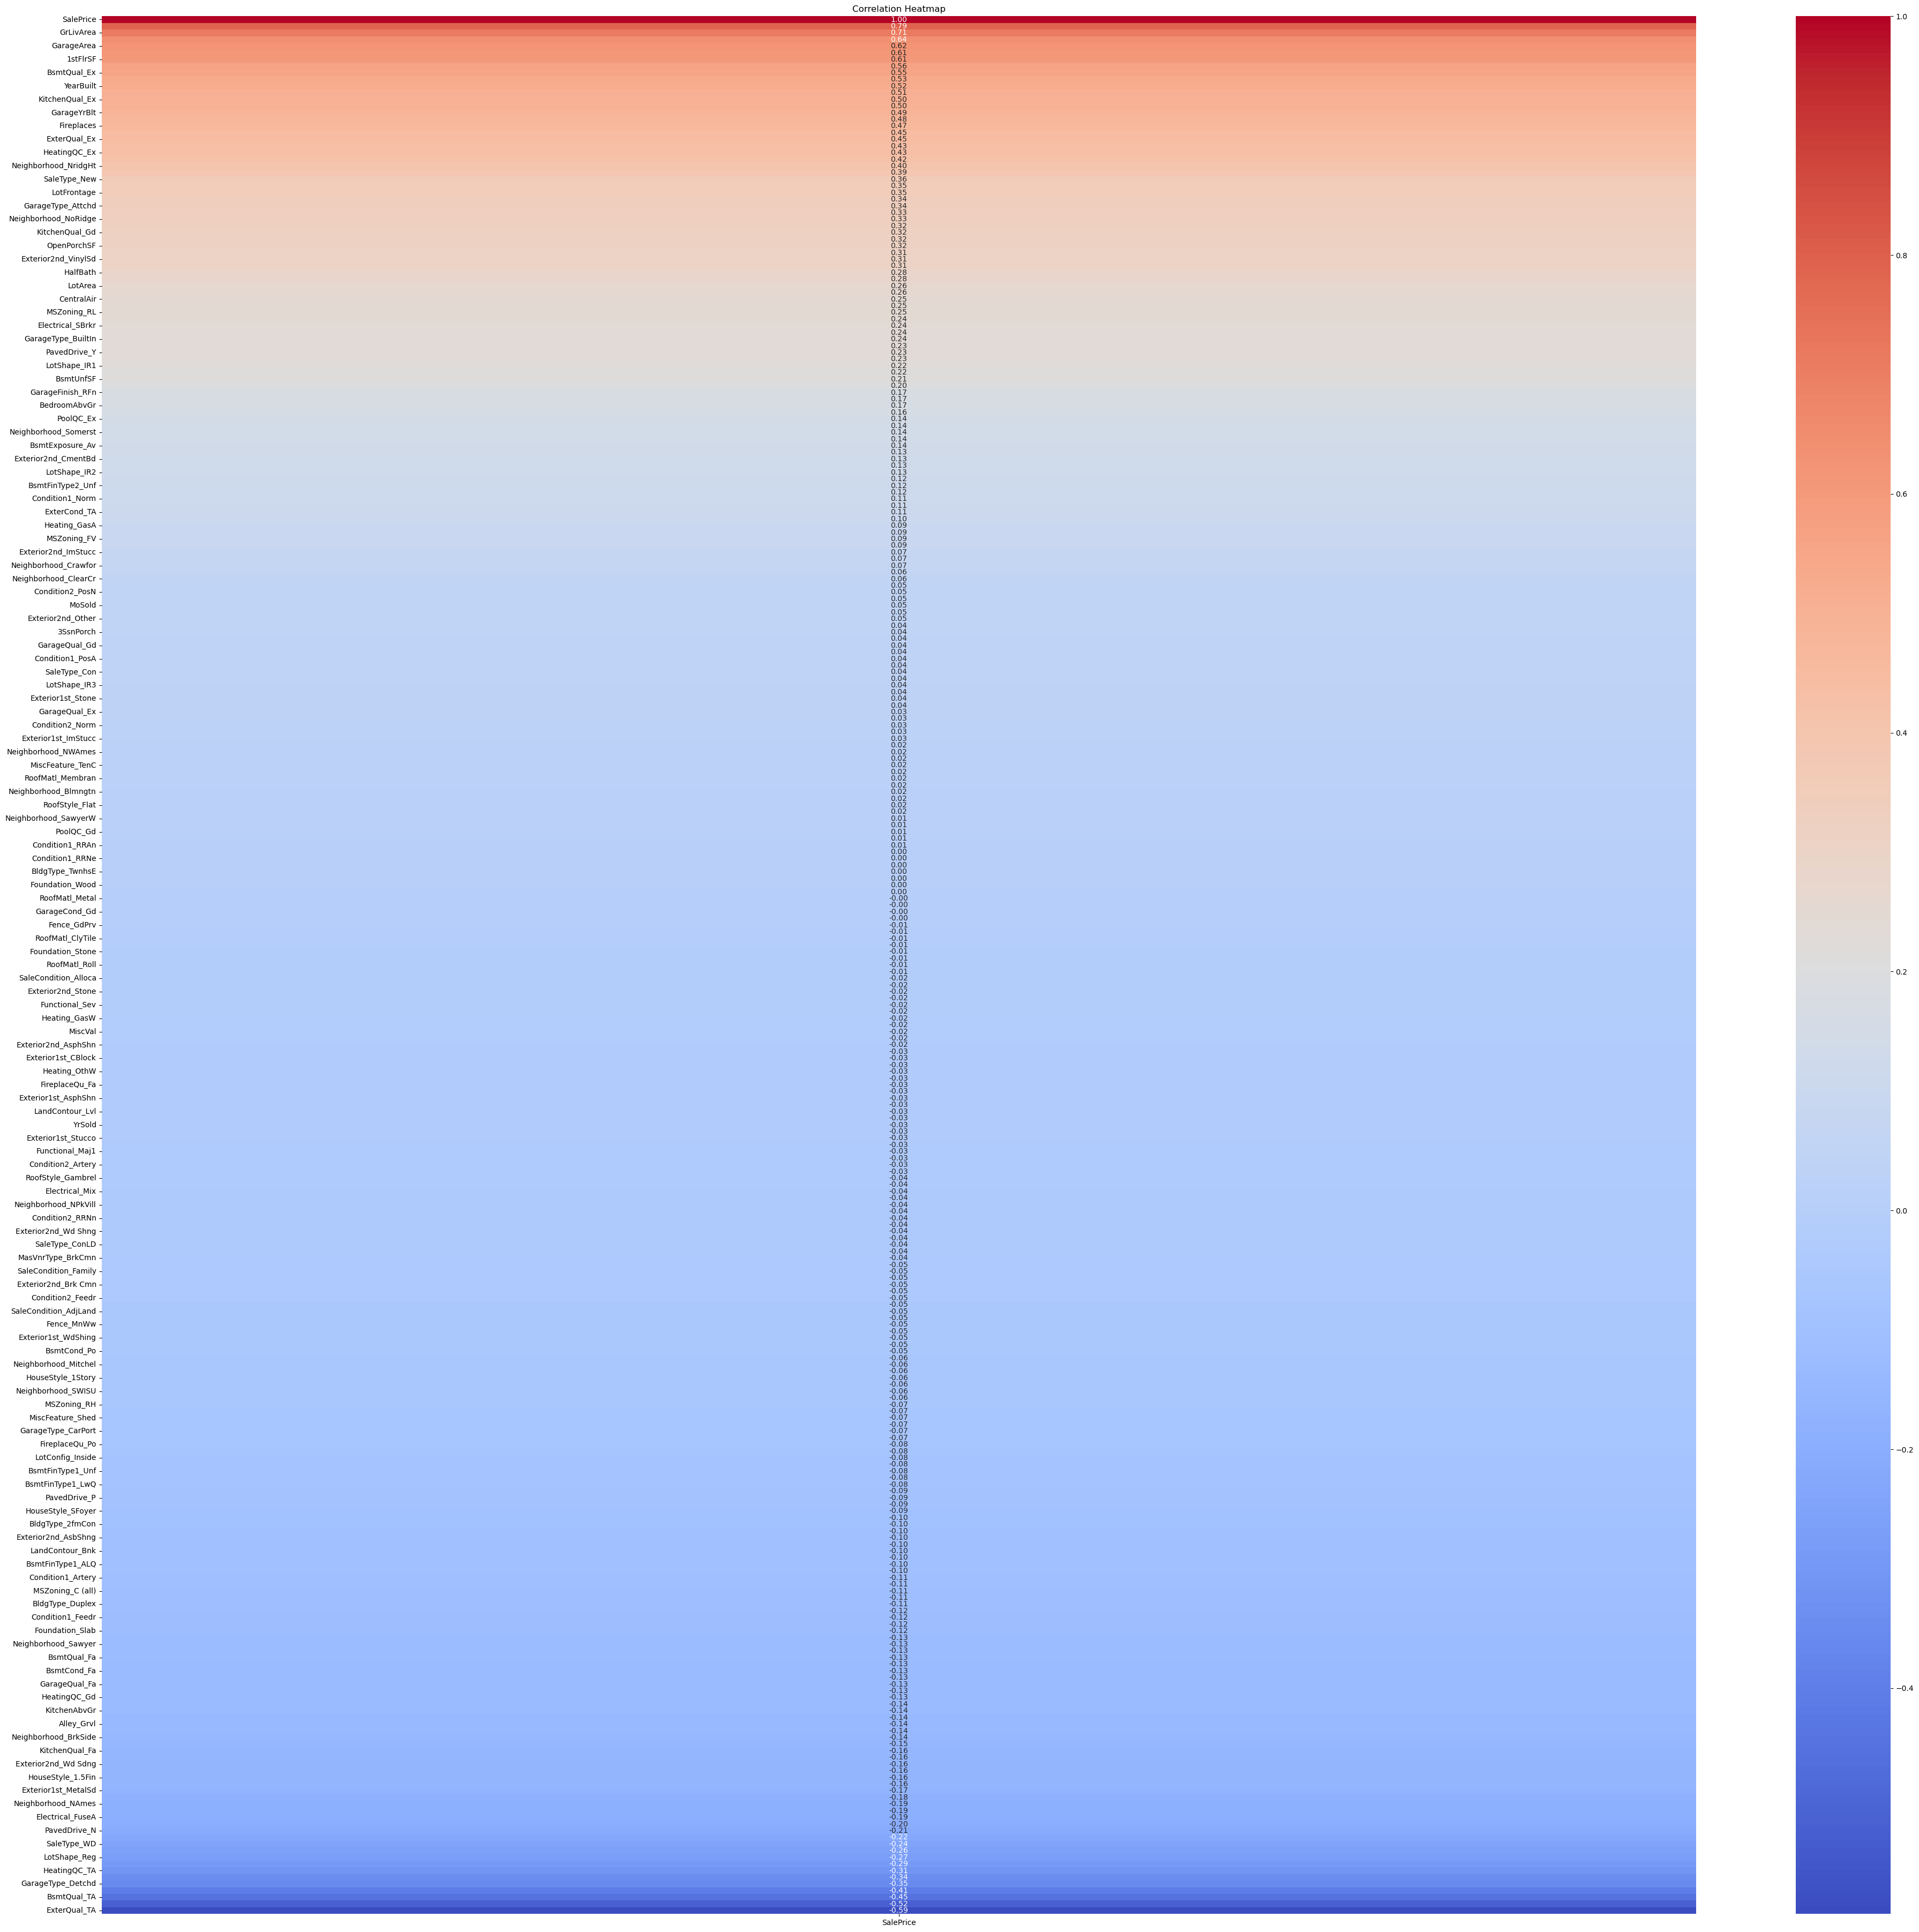

In [330]:
corr= data_preprocessed.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(48,46))
sns.heatmap(corr.to_frame(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [331]:
selected_features = corr[abs(corr) >= 0.1].index.tolist()
print("Selected features:", selected_features)

Selected features: ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex', 'Foundation_PConc', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'ExterQual_Gd', 'ExterQual_Ex', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'GarageFinish_Fin', 'Neighborhood_NridgHt', 'BsmtFinSF1', 'SaleType_New', 'SaleCondition_Partial', 'LotFrontage', 'FireplaceQu_Gd', 'GarageType_Attchd', 'MasVnrType_Stone', 'Neighborhood_NoRidge', 'WoodDeckSF', 'KitchenQual_Gd', '2ndFlrSF', 'OpenPorchSF', 'BsmtExposure_Gd', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'HalfBath', 'GarageCond_TA', 'LotArea', 'FireplaceQu_Ex', 'CentralAir', 'GarageQual_TA', 'MSZoning_RL', 'HouseStyle_2Story', 'Electrical_SBrkr', 'RoofStyle_Hip', 'GarageType_BuiltIn', 'BsmtQual_Gd', 'PavedDrive_Y', 'BsmtFullBath', 'LotShape_IR1', 'Neighborhood_StoneBr', 'BsmtUnfSF', 'MasVnrType_BrkFace', 'GarageFinish_RFn', 'RoofMatl_WdShng

In [332]:
data_filtered = data_preprocessed[selected_features]
data_filtered.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,...,BsmtExposure_No,LotShape_Reg,MSZoning_RM,HeatingQC_TA,Foundation_CBlock,GarageType_Detchd,GarageFinish_Unf,BsmtQual_TA,KitchenQual_TA,ExterQual_TA
0,208500,7,1710,2,548,856,856,2,False,8,...,True,True,False,False,False,False,False,False,False,False
1,181500,6,1262,2,460,1262,1262,2,False,6,...,False,True,False,False,True,False,False,False,True,True
2,223500,7,1786,2,608,920,920,2,False,6,...,False,False,False,False,False,False,False,False,False,False
3,140000,7,1717,3,642,756,961,1,False,7,...,True,False,False,False,False,True,True,True,False,True
4,250000,8,2198,3,836,1145,1145,2,False,9,...,False,False,False,False,False,False,False,False,False,False


Training the model

In [333]:
model=XGBRegressor(objective='reg:squarederror', random_state=42)

In [334]:
X = data_filtered.drop(['SalePrice'], axis=1)
y = data_filtered['SalePrice']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [336]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [337]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [338]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [339]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score: 0.8786682287851969


In [340]:
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test, y_test)

In [341]:
print("Test R² score:", test_score)

Test R² score: 0.9109342098236084


Saving the model

In [342]:
joblib.dump(model, 'house_price_model.pkl')

joblib.dump(X.columns, 'model_features.pkl')


['model_features.pkl']